# Project - Group 12

**Abhishek Singh** - **46339868**

**Arzoo Nayeem**  - **46218858**

**Harsimranjeet Singh** - **46238301**

**Tanisha Nourin Alam** - **46159770**

# Analysis on Customer Reviews of Amazon Product's



For our project we are aiming to do sentiment analysis on customer reviews of Amazons electronic products like  Kindle, Fire TV Stick, Kindle Voyage E-reader and many more. The dataset we will be using for our analysis was obtanined from [Data World](https://data.world/datafiniti/consumer-reviews-of-amazon-products) which contains more than 28,000 reviews of products.

This File is divided into five major parts -

#### 1) Data Exploration
    - This part gives information about shape of data, its distribution, word cloud(wich words are frequent), Description of columns in data, summary statistics etc.
#### 2) Visualization
    - Different graphs are plotted to get information about different products and their reviews like which are most reviewed products, count of words in review, deep diving in some particular products to see behaviour of customers towards that product.
#### 3) Pre-Processing
    - Performed data preprocessing to prepare the text data for Sentiment Analysis. For example lower casing to avoid doublle count of same word, Lemmatization, removal of stop words and emoticons.
#### 4) Model Builiding
    - After cleaning the data in this part we are maing model to predict whether revieww is bad or good. For that,  TfidfVectorizer is used for feature extraction and  Logistic Regression as base model, Multi Layer perceptron is  used to improve performance
#### 5) Appendix
    - Results of other tried models like Decision tree, SVM and Count vectorizer, Word2vec for feature extraction but these models have less efficiancy.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import string
import time
import nltk


# NLP packages

import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn import tree
from collections import Counter
from wordcloud import WordCloud

# Different models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score


# Ignore warnings

from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

# 1) Exploration of Data

In [2]:
# Reading the csv file
Amazon_data = pd.read_csv('https://query.data.world/s/kxpnmeeabp2sv7wiuo7td57bfgecap')
Amazon_data.head()

id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
1  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
2  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
3  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
4  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   

  primaryCategories                                          imageURLs  \
0   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
1   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
2   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
3   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
4   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   

                                                keys  ... reviews.didPurchase  \
0  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
1  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
2  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
3  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
4  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   

  reviews.doRecommend reviews.id reviews.numHelpful reviews.rating  \
0                 NaN        NaN                NaN              3   
1                 NaN        NaN                NaN              4   
2                 NaN        NaN                NaN              5   
3                 NaN        NaN                NaN              5   
4                 NaN        NaN                NaN              5   

                                  reviews.sourceURLs  \
0  https://www.amazon.com/product-reviews/B00QWO9...   
1  https://www.amazon.com/product-reviews/B00QWO9...   
2  https://www.amazon.com/product-reviews/B00QWO9...   
3  https://www.amazon.com/product-reviews/B00QWO9...   
4  https://www.amazon.com/product-reviews/B00QWO9...   

                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews.title  reviews.username  \
0  ... 3 of them and one of the item is bad quali...        Byger yang   
1  ... always the less expensive way to go for pr...              ByMG   
2  ... are not Duracell but for the price i am ha...  BySharon Lambert   
3  ... as well as name brand batteries at a much ...     Bymark sexson   
4  ... batteries are very long lasting the price ...           Bylinda   

                                          sourceURLs  
0  https://www.barcodable.com/upc/841710106442,ht...  
1  https://www.barcodable.com/upc/841710106442,ht...  
2  https://www.barcodable.com/upc/841710106442,ht...  
3  htt

In [3]:
#Shape of the dataset
print("Shape of the Amazon consumer review dataset:",Amazon_data.shape)

Shape of the Amazon consumer review dataset: (28332, 24)


- We have 28,332 rows and 24 columns available

## 1.1 Description of columns:

We can see that our dataset has 28,332 rows and 24 columns. lets look into the description of each column.

1. **Id** : Identifier number of this product
2. **dateAdded** : The date this product was first added to the product database(Field type: date)
3. **dateUpdated** : The most recent date this product was updated or seen by our system(Field type: date)
4. **name** : The name for items(Field type: text)
5. **asins** : The ASIN (Amazon identifier) used for the product.
6. **brand** : The brand name of this product.
7. **categories** : A list of category keywords used for this product across multiple sources. (Field type: text)
8. **primaryCategories** : A list of standardized categories to which this product belongs.
9. **imageURLs** : A list of image URLs for this product(Field type: keyword)
10. **keys** : A list of internal Datafiniti identifiers for this product.
11. **manufacturer** : The manufacturer of this product(Field type: text)
12. **manufacturerNumber** : The manufacturer or model number of this product(Field type: keyword)
13. **reviews.date** : The date the review was posted
14. **reviews.dateSeen** : The date when the review was seen by Datafiniti.
15. **reviews.didPurchase** : A true/false for whether or not the reviewer did purchase the product.
16. **reviews.doRecommend** : A true/false for whether or not the reviewer recommends the product.
17. **reviews.id** : The website ID associated with this review.
18. **reviews.numHelpful** : The number of people that found this review helpful.
19. **reviews.rating** : A 1 to 5 start value for the review.
20. **reviews.sourceURLs** : A list of URLs where this review was seen.
21. **reviews.text** : The full (or available) text of the review.
22. **reviews.title** : The review's title.
23. **reviews.username** : The reviewer's username(Field type: text)
24. **sourceURLs** : A list of URLs where this term was seen(Field type: keyword)



## 1.2 Checking for Null values in the columns :

In [4]:
#Checking for null values
Amazon_data.isna().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
sourceURLs                 0
dtype: int64

- The columns reviews.did Purchase, review.doRecommend, review.numHelpful has incomplete records having null values. We will drop these columns.
- Next we will drop columns that are irrelevant to our analysis

In [5]:
## Dropping irrelevant columns

Amazon_data.drop([ 'brand','reviews.dateSeen','id','asins', 
                  'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber',
                  'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 
                  'reviews.title', 'reviews.username', 'sourceURLs','reviews.sourceURLs'], axis=1, inplace=True)

Amazon_data.head()

dateAdded           dateUpdated  \
0  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name  \
0  AmazonBasics AAA Performance Alkaline Batterie...   
1  AmazonBasics AAA Performance Alkaline Batterie...   
2  AmazonBasics AAA Performance Alkaline Batterie...   
3  AmazonBasics AAA Performance Alkaline Batterie...   
4  AmazonBasics AAA Performance Alkaline Batterie...   

                                          categories primaryCategories  \
0  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
1  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
2  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
3  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
4  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   

               reviews.date  reviews.rating  \
0  2017-03-02T00:00:00.000Z               3   
1  2016-08-31T00:00:00.000Z               4   
2  2016-12-06T00:00:00.000Z               5   
3  2016-03-28T00:00:00.000Z               5   
4  2017-04-22T00:00:00.000Z               5   

                                        reviews.text  
0  I order 3 of them and one of the item is bad q...  
1  Bulk is always the less expensive way to go fo...  
2  Well they are not Duracell but for the price i...  
3  Seem to work as well as name brand batteries a...  
4  These batteries are very long lasting the pric...

- To get exact outcomes, 8 sections are chosen from the complete of 24 segments which we find critical to catch sentiment analysis and results. Dataset is put away in "Amazon_data" where we will utilize this dataframe for additional analysis.

## 1.3 Summary statistics of numerical feature :

In [6]:
#Summary Statistics

print("Summary Statistics of Numerical features : \n",Amazon_data.describe())

print("\nTotal number of reviews: ",len(Amazon_data))
print("\nTotal number of Categories: ", len(list(set(Amazon_data['categories']))))
print("\nTotal number of unique products: ", len(list(set(Amazon_data['name']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(Amazon_data[Amazon_data['reviews.rating']==3]["reviews.text"].count()/len(Amazon_data)*100),"(Rating = 3)")
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(Amazon_data[Amazon_data['reviews.rating']>3]["reviews.text"].count()/len(Amazon_data)*100),"(Rating > 3)")
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(Amazon_data[Amazon_data['reviews.rating']<3]["reviews.text"].count()/len(Amazon_data)*100), "(Rating < 3)")

Summary Statistics of Numerical features : 
        reviews.rating
count    28332.000000
mean         4.514048
std          0.934957
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

Total number of reviews:  28332

Total number of Categories:  60

Total number of unique products:  65

Percentage of reviews with neutral sentiment : 4.26% (Rating = 3)

Percentage of reviews with positive sentiment : 90.16% (Rating > 3)

Percentage of reviews with negative sentiment : 5.58% (Rating < 3)


## 1.4 Product categories :


In [7]:
categories=Amazon_data['primaryCategories'].value_counts()
categories

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [8]:
# Bar Graph of Different Categories
fig, ax = plt.subplots(figsize=(10,5))
ax=categories.plot.bar()
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Categories')

Text(0.5, 1.0, 'Distribution of Categories')

- In our dataset, majorly products are of Electronics and health beauty or we can infer that Amazon is more focusing on these categories.

## 1.5 Wordcloud 

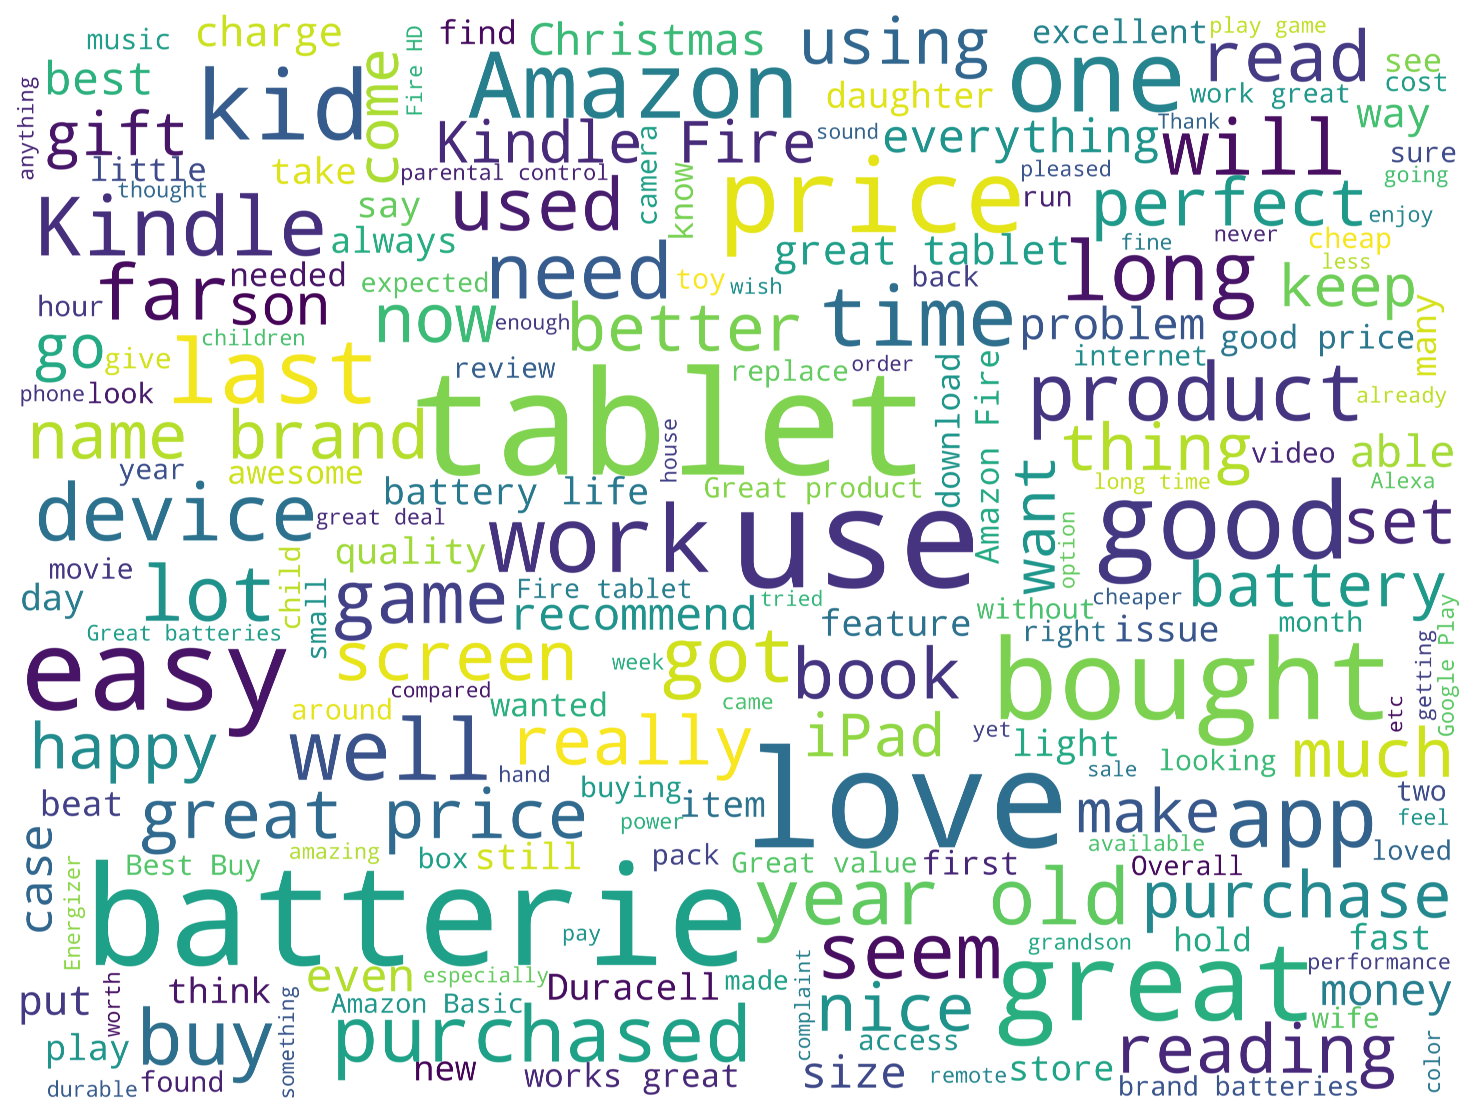

In [9]:
cloud_text = ''.join(Amazon_data['reviews.text'])

cloud = WordCloud(max_font_size=200, # Maximum font size for the largest word
                      max_words=200, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 15, # Scaling between computation and drawing
                      width=2000, # Width of the canvas
                      height=1500 # Height of the canvas
                     ).generate(cloud_text)

plt.figure(figsize=(15, 10))
plt.imshow(cloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

- Word cloud talks about electronic products more like batteries, tablet and also some positive words like good, happy, easy many more

# 2) Visualization

## 2.1 Reviewer's rating distribution among products:

In [10]:
# Percentage distribution of rating in data
rating_dist = 100 * Amazon_data['reviews.rating'].value_counts()/len(Amazon_data)
rating_dist

5    70.228011
4    19.935056
3     4.256671
1     3.406043
2     2.174220
Name: reviews.rating, dtype: float64

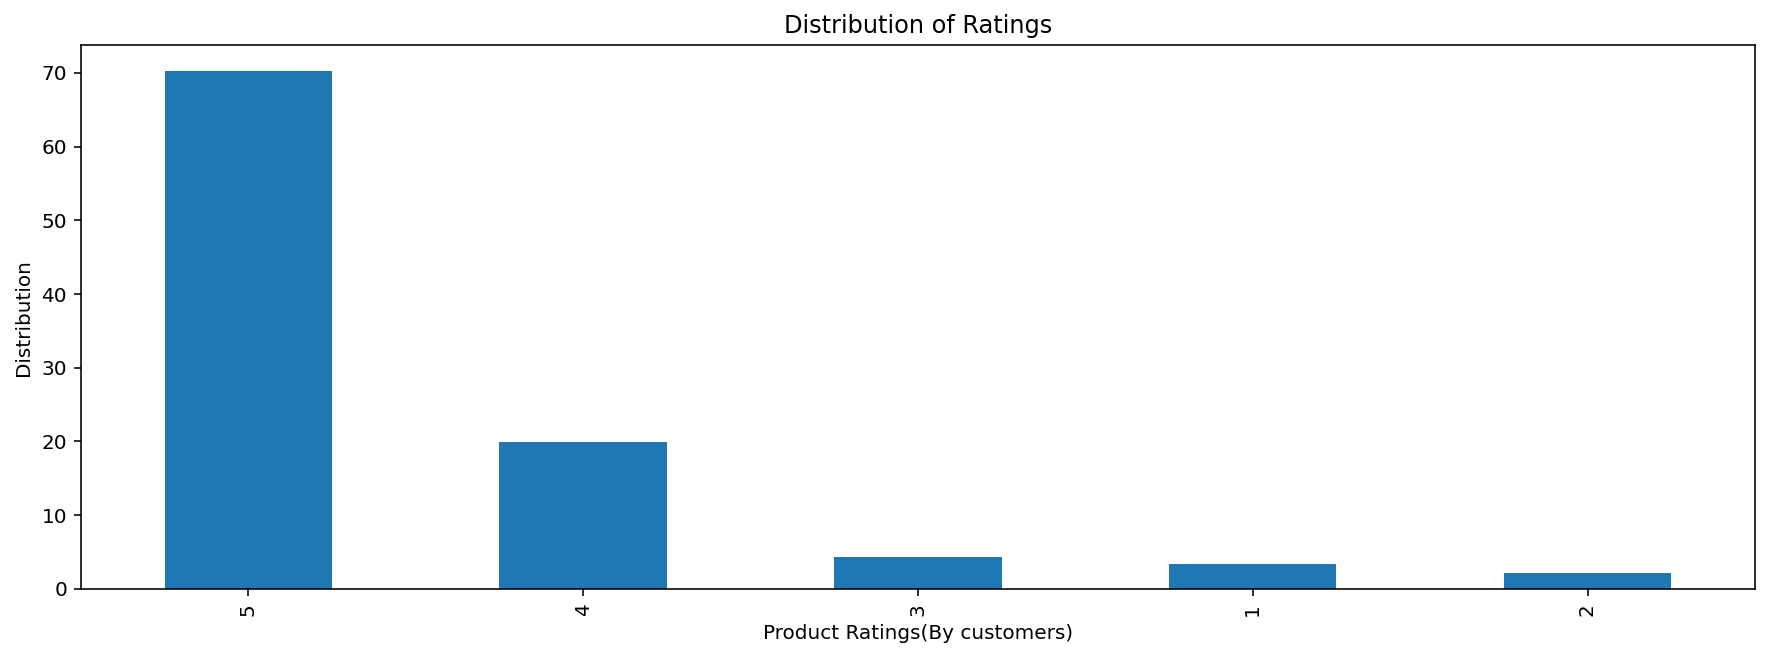

In [11]:
# Plot the graph
fig, ax = plt.subplots(figsize=(15,5))
ax=rating_dist.plot.bar()
ax.set_title("Distribution of Ratings")
ax.set_xlabel("Product Ratings(By customers)")
ax.set_ylabel("Distribution")

plt.show()

- It is clearly evident from the above analysis that we have imbalanced classes, no. of positive ratings are high which is definitely going to effect the efficiency of the models.

## 2.2 Count of words/Review

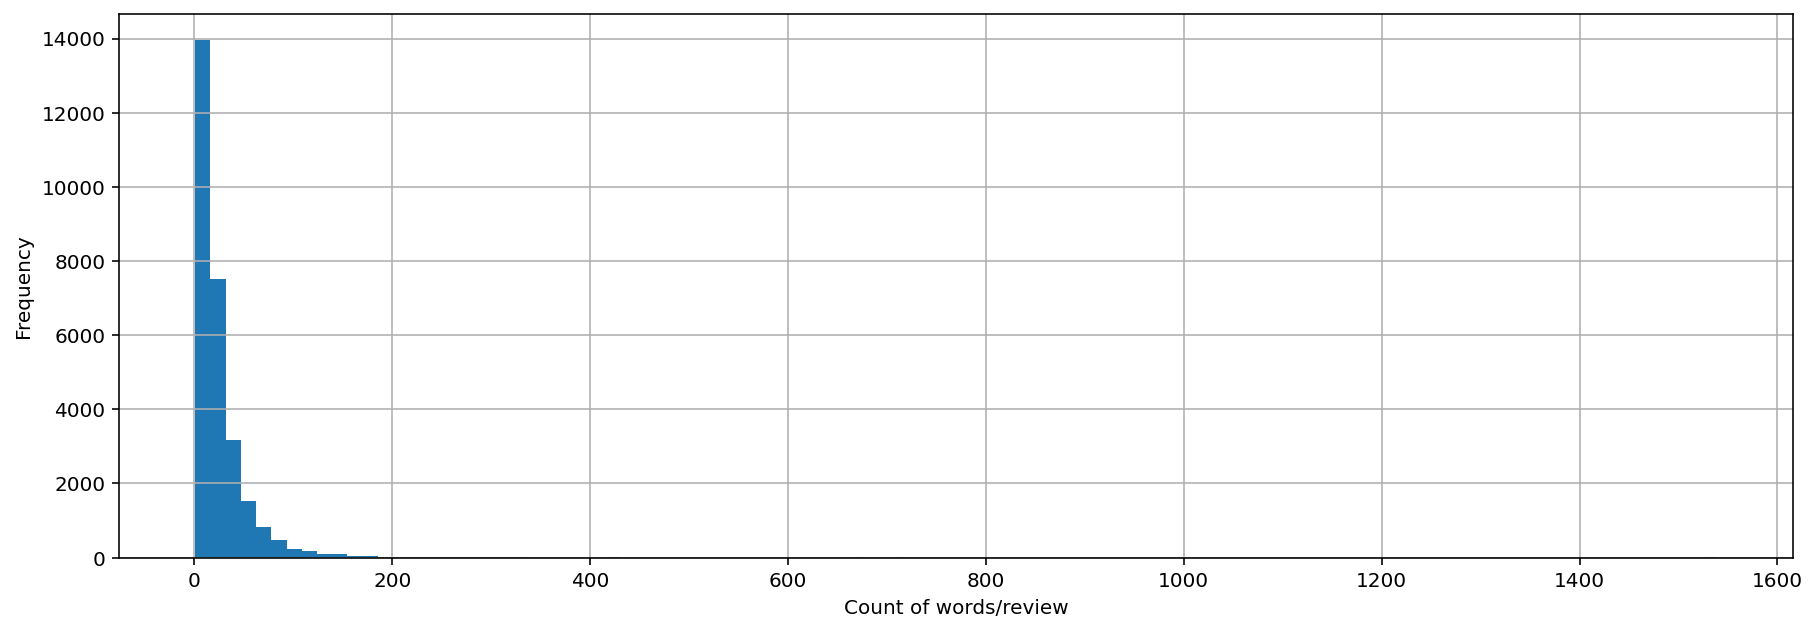

Average words/review: 25.945150360016942


In [12]:
# Count of words/review for each product
words = Amazon_data['reviews.text'].apply(lambda x: len(x.split(" ")))

fig, ax = plt.subplots(figsize=(15,5))

ax=words.hist(bins = 100)
plt.xlabel('Count of words/review')
plt.ylabel('Frequency')
plt.show()

print('Average words/review:', words.mean())

- From the above graph tt can be inferenced that Words/review are right skewed and Average words/ review is 25 means reviews are not in detail.

## 2.3 The most reviwed amazon products

In [13]:
#Getting the review count of each product

most_reviewed=Amazon_data.groupby('name').count()
most_reviewed=most_reviewed.sort_values(by='reviews.rating', ascending=False)

In [14]:
#Plotting the Number of reviews for each product

top_reviewed= most_reviewed[:20]

fig, ax = plt.subplots(figsize=(15,5))
ax=sns.barplot(x=top_reviewed.index,y=top_reviewed['reviews.rating'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Name of the products")
ax.set_ylabel("Number of reviews")
plt.title('Most Reviewed Products')


Text(0.5, 1.0, 'Most Reviewed Products')

- By looking on above graph we can say that AAA alkaline batteries have most numbers of reviews but it does not infer that AAA batteries are most popular.As Alkaline batteries have highest number of records in the dataset thus its also giving higher number of reviews count.


- We will suggest here that these products should be compare on the basis of months on book not on counts of reviews in given dataset.

## 2.4 The highest positive reviews:


In [15]:
#Getting the count of positive reviews of products
positive_reviews= Amazon_data[Amazon_data['reviews.rating']>3]
highest_reviews=positive_reviews.groupby('name').count()
highest_reviews=highest_reviews.sort_values(by='reviews.rating', ascending=False)

Text(0.5, 1.0, ' Products Vs Number of postive reviews')

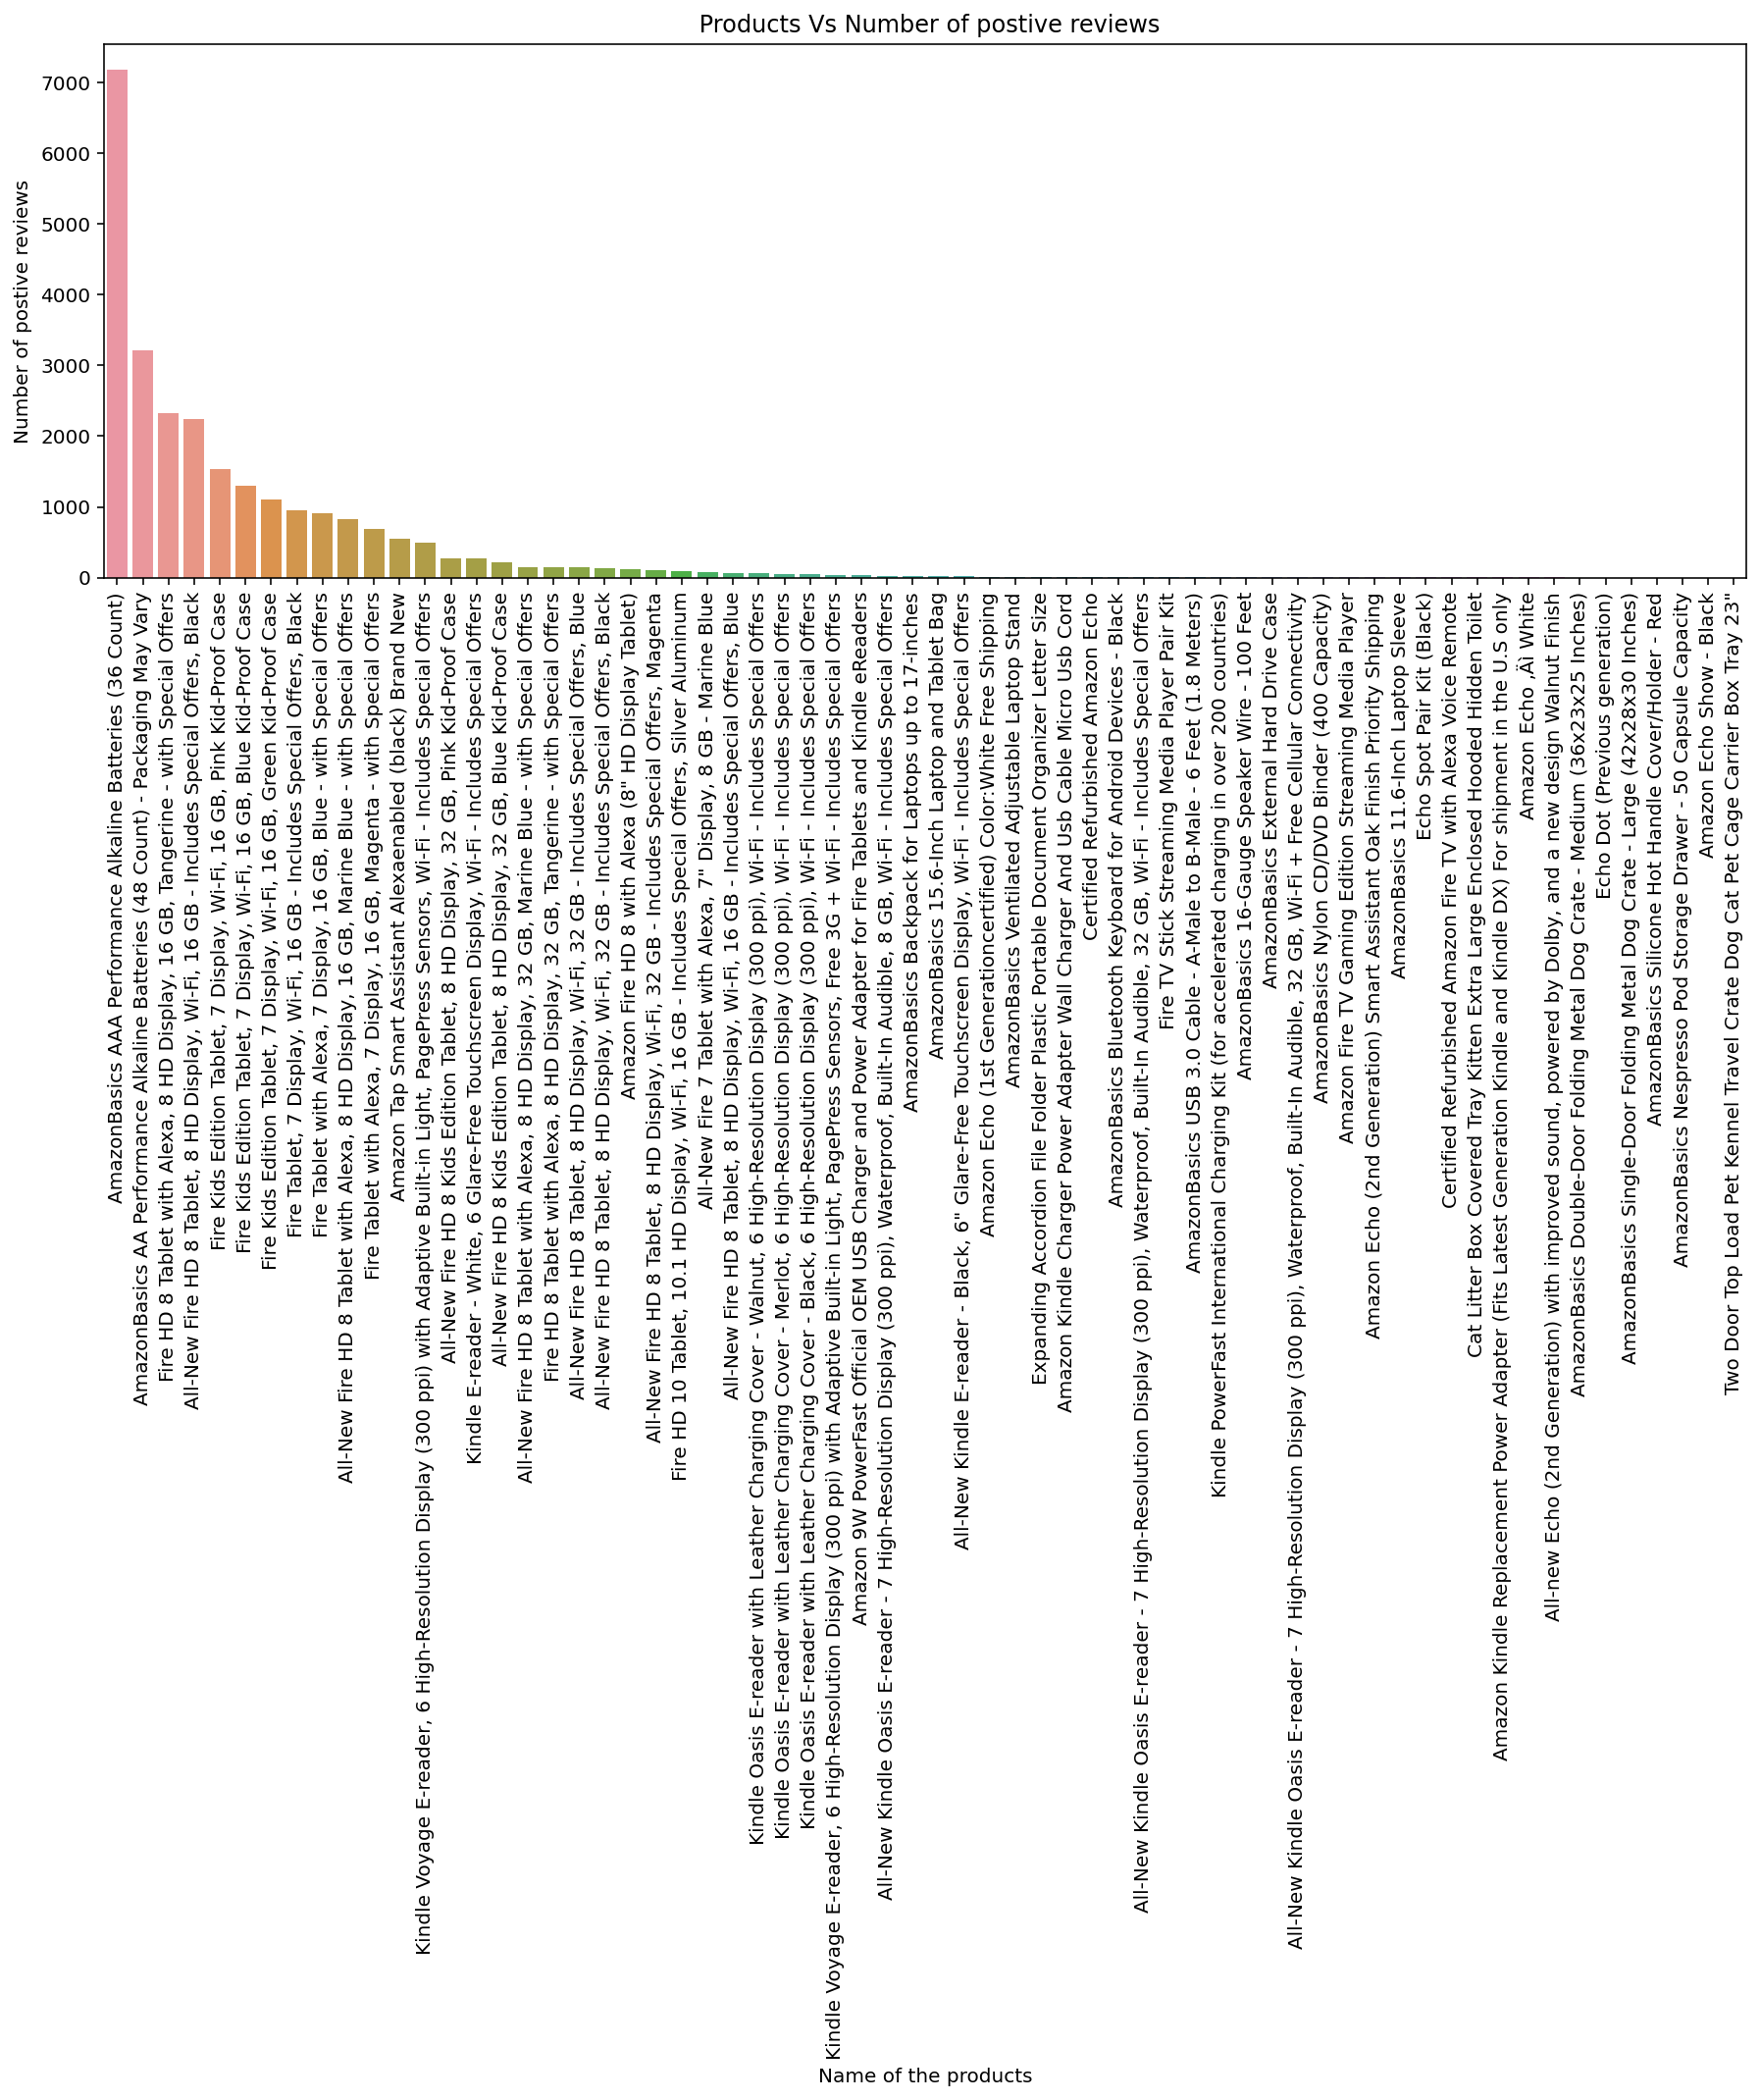

In [16]:
#Plotting the graph 
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.barplot(x=highest_reviews.index,y=highest_reviews['reviews.rating'])


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Name of the products")
ax.set_ylabel("Number of postive reviews")
ax.set_title(" Products Vs Number of postive reviews")

- The graph also gives similar result like before, **Alkaline batteries** are getting highest positive reviews. As the number of records are higher in case of batteries we can't get any insight regarding which products are getting more positive reviews or are popular among customers.


- We will try to see which products are getting highest positive reviews compared to the total number of reviews for that particular product.

In [17]:
# Getting all the products having positive reviews and diving by the total num of reviews availiable for that product

positive_reviews= Amazon_data[Amazon_data['reviews.rating']>3]
highest_reviews=positive_reviews.groupby('name').count()/Amazon_data.groupby('name').count() #Dividing by the number of reviews
highest_reviews=highest_reviews.sort_values(by='reviews.rating', ascending=False)


In [18]:
#Plotting the graph 
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.barplot(x=highest_reviews.index,y=highest_reviews['reviews.rating'])


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Name of the products")
ax.set_ylabel("Percentage")
ax.set_title(" Percentage of Positive reviews")

Text(0.5, 1.0, ' Percentage of Positive reviews')

- From the above graph we can see that products like (Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23), (AmazonBasics Silicone Hot Handle Cover/Holder - Red), (Fire TV Stick Streaming Media Player Pair Kit) do not have any negative reviews means in actuals these products are performing better in customer satisfication compartively


- Also as our dataset is unbalanced and has more positive ratings from the customers we can see for all the products the percentage of positive rating is higher or we can say our dataset includes popular products, means people are satisfied after buying this products

## 2.5 Negative Reviews for products
-  Due to imbalanced classes, we are ploting negative reviews/the total num of reviews, similiar to above analysis.

In [19]:
#Getting all the products having negative reviews
negative_reviews= Amazon_data[Amazon_data['reviews.rating']<3]
negative_reviews=negative_reviews.groupby('name').count()/Amazon_data.groupby('name').count() #Dividing by the number of reviews
negative_reviews=negative_reviews.sort_values(by='reviews.rating', ascending=False)

Text(0.5, 1.0, 'Percentage of Negative reviews')

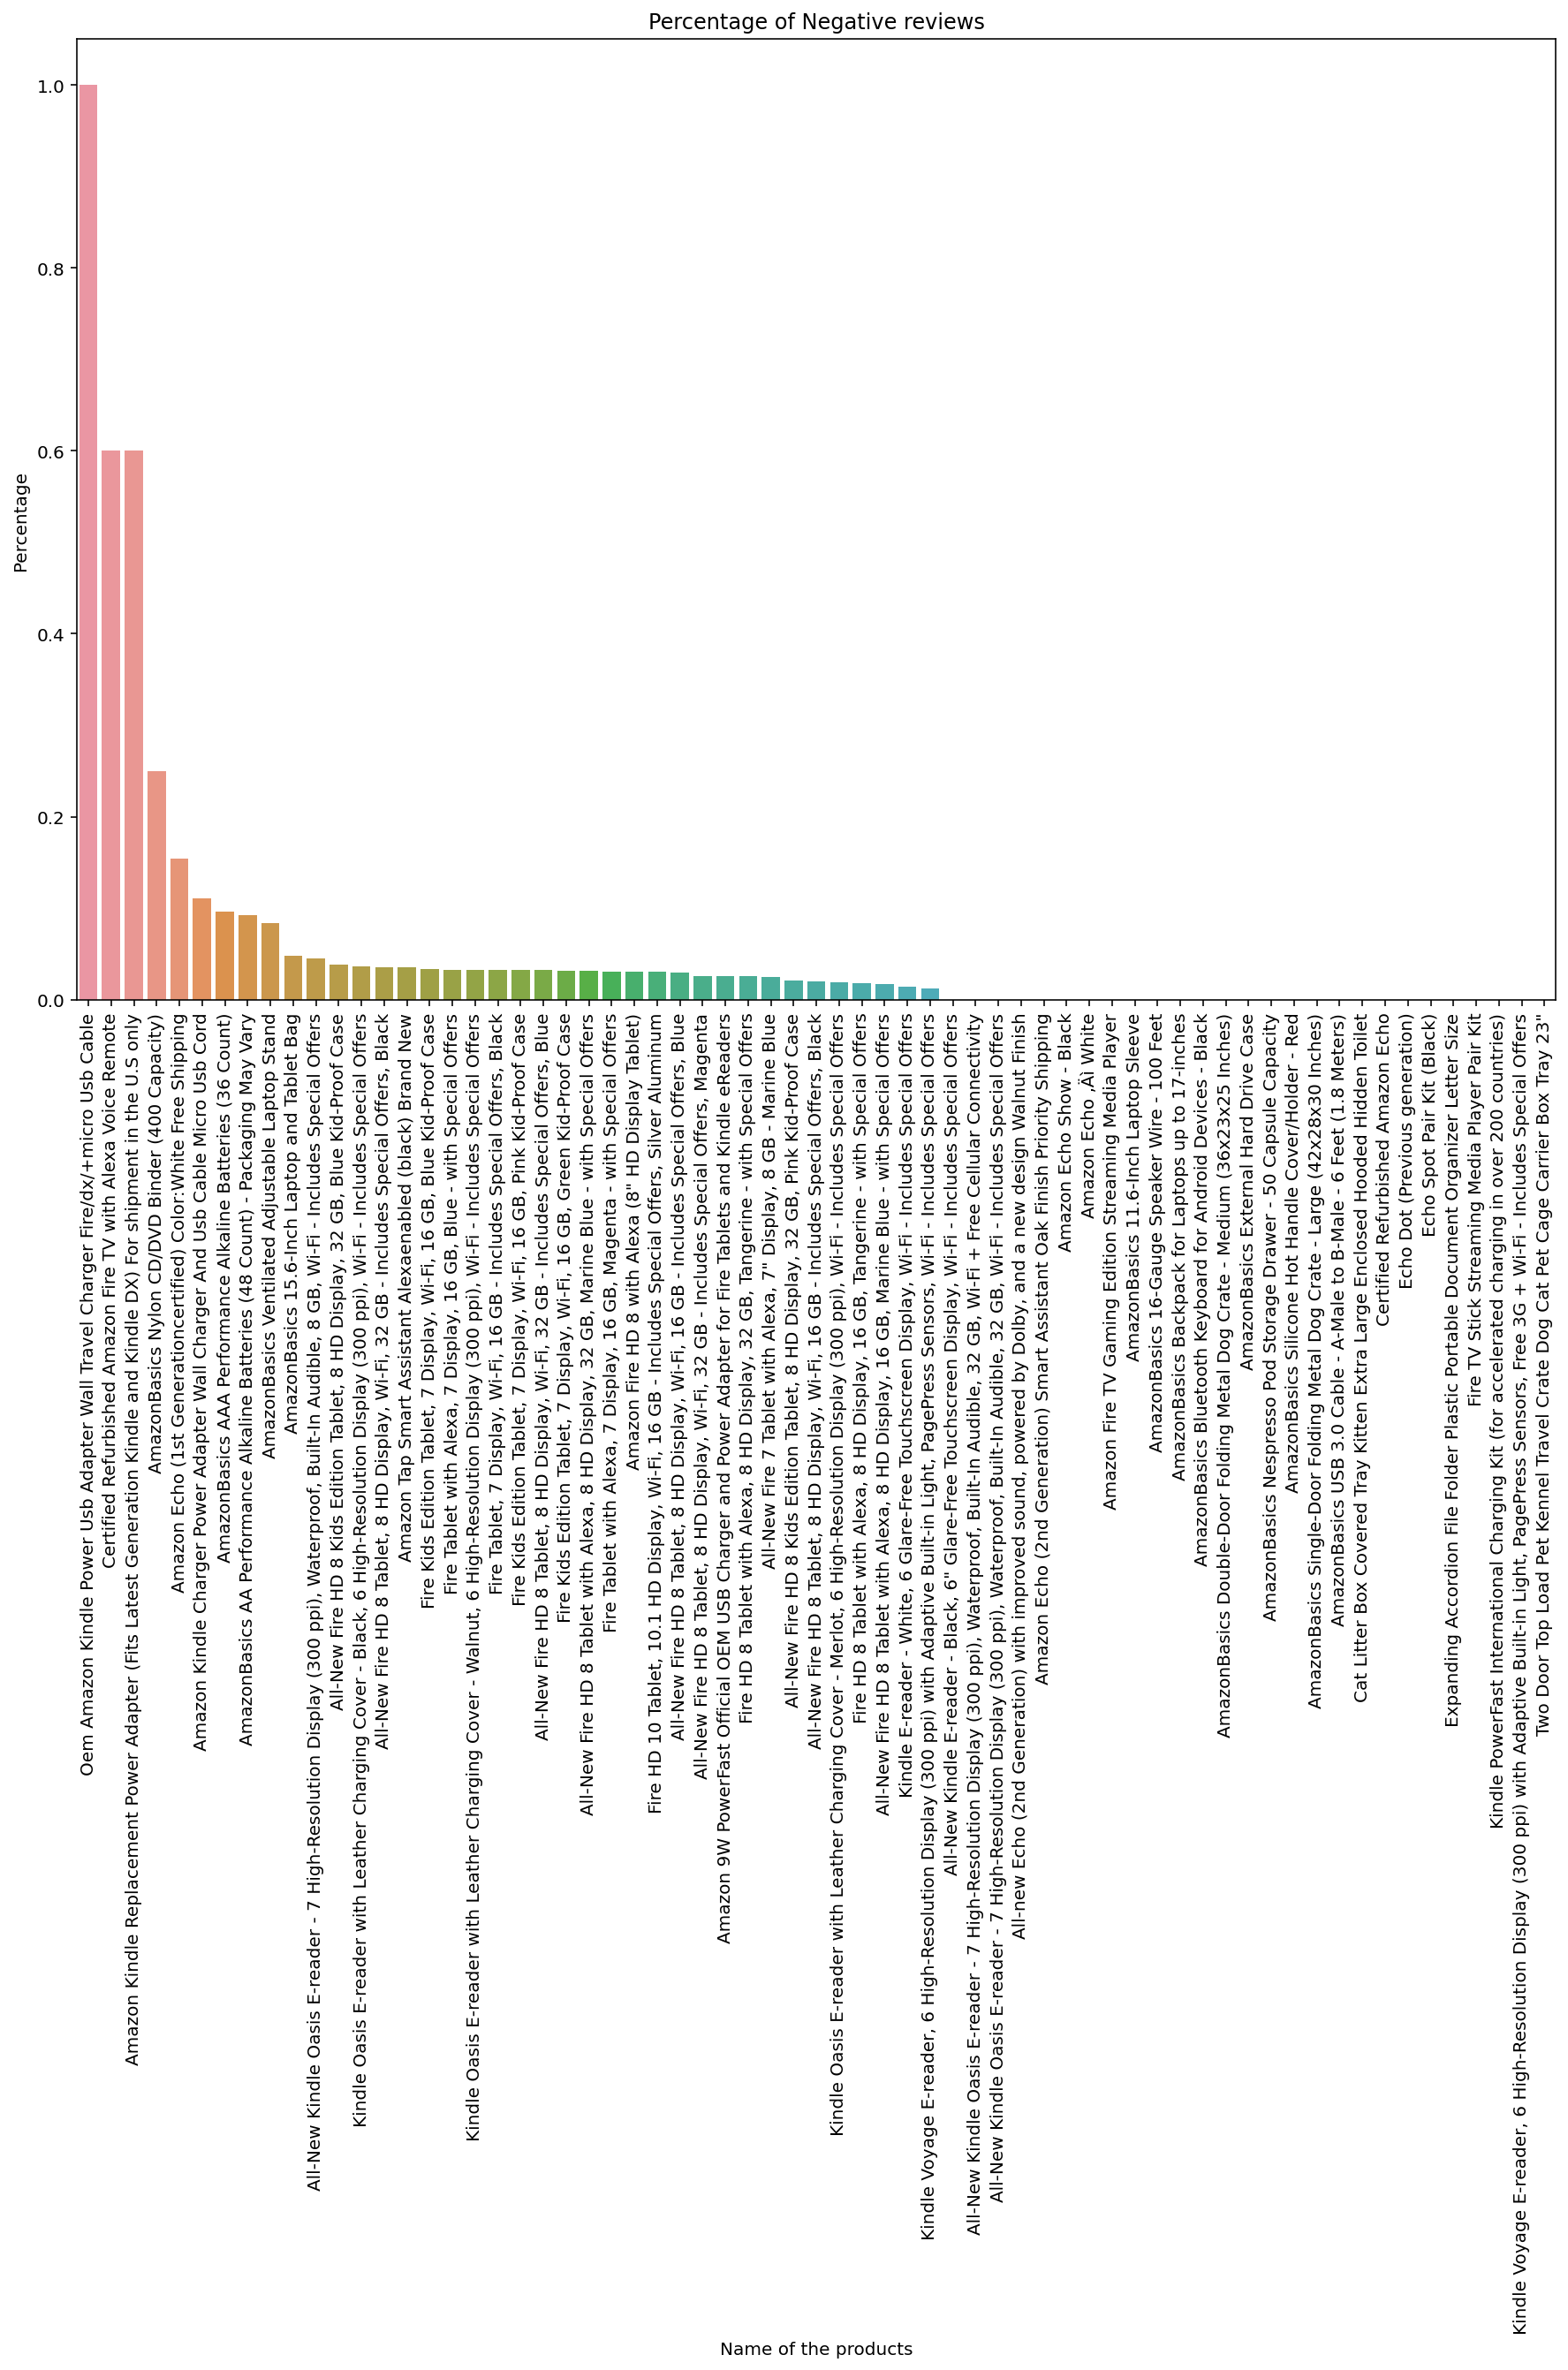

In [20]:
#Plotting the bar
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.barplot(x=negative_reviews.index,y=negative_reviews['reviews.rating'])


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Name of the products")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Negative reviews")

- From the graph we can see that **Oem Amazon Kindle Power Usb Adapter Wall Travel Charger Fire/dx/+micro Usb Cable** has only negative reviews. **Certified Refurbished Amazon Fire TV with Alexa Voice Remote** and **Amazon Kindle Replacement Power Adapter** (Fits Latest Generation Kindle and Kindle DX) are getting majority of the reviews as negative. In other words, customers are not happy after buying these produts.


- Also for these products there are very less numbers of reviews in the dataset(Not more than 3). So we are not sure, if we can deduce that these products are not popular among the customers.

## 2.6 Performance of amazon products in particular timeline (Comparing with the launch date as of dataset)
- For our analysis we will take top 3 products from our dataset that has the higher number of records.

In [21]:
#Getting year and month from the reviews date column
Amazon_data['reviews.date']=pd.to_datetime(Amazon_data['reviews.date'])
Amazon_data['review_year']=Amazon_data['reviews.date'].dt.year
Amazon_data['review_month']=Amazon_data['reviews.date'].dt.month

### 2.6.1 Product 1 :AmazonBasics AAA Performance Alkaline Batteries

In [22]:
#Taking only the Alkaline batteries (36count)
batterie=Amazon_data[(Amazon_data['name']=='AmazonBasics AAA Performance Alkaline Batteries (36 Count)' ) & ( Amazon_data['reviews.rating']>3)]
positive_review=batterie.groupby('review_year').sum()

Text(0.5, 1.0, ' No. of Positive reviews/Years ')

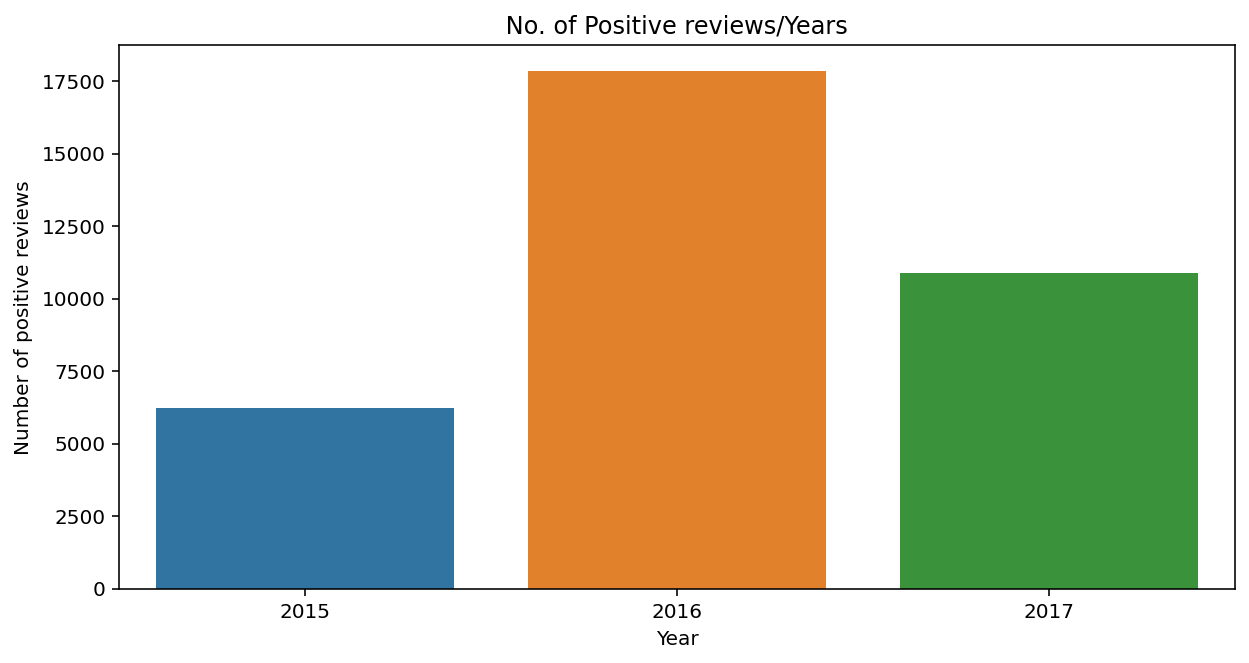

In [23]:
#Plotting the graph
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=positive_review.index,y='reviews.rating',data=positive_review)

ax.set_xlabel("Year")
ax.set_ylabel("Number of positive reviews")
ax.set_title(" No. of Positive reviews/Years ")

- According to our dataset, Amazon batteries launched (as of dataset) in 2015 and it starts gaining poularity and it peaked in 2016 and then come down in 2017.

- We do not have have sufficient information to predict the reason of falling.

### Deep dive in the year 2017 according to month

In [24]:
# Setting the year 2017
batterie = batterie [batterie['review_year'] == 2017]
positive_review=batterie.groupby('review_month').sum()

Text(0.5, 1.0, ' Monthly Analysis of FY2017')

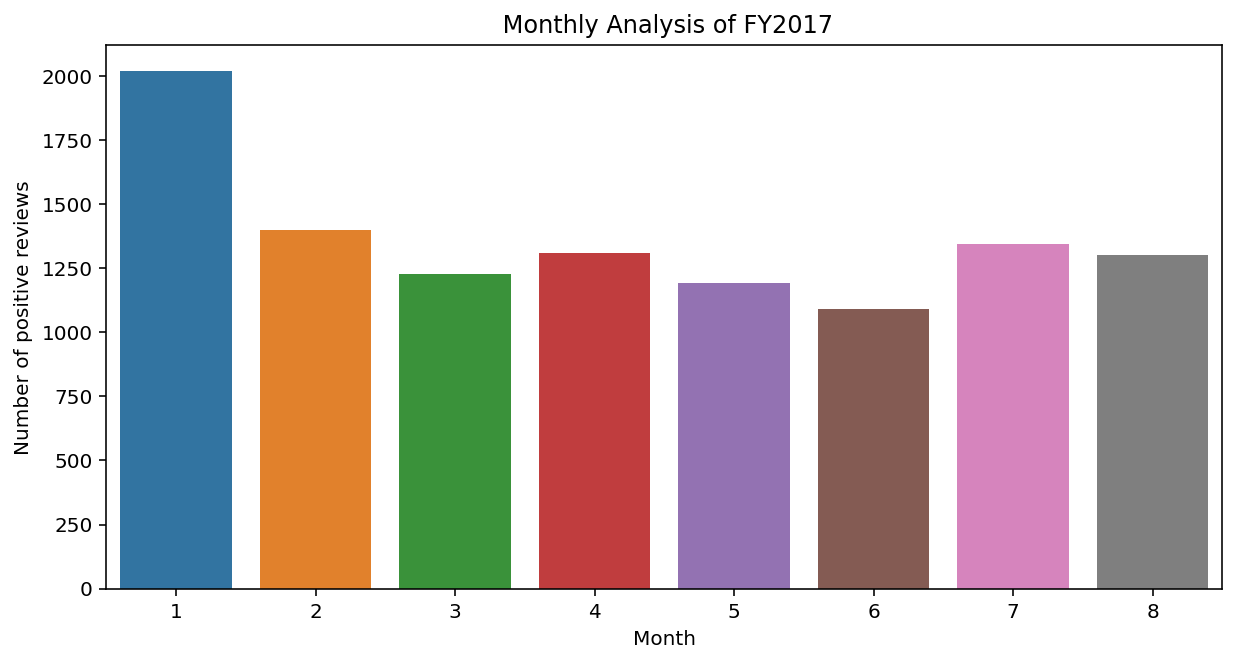

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=positive_review.index,y='reviews.rating',data=positive_review)

ax.set_xlabel("Month")
ax.set_ylabel("Number of positive reviews")
ax.set_title(" Monthly Analysis of FY2017")

- By using our data we can suggest Amazon to look on  degrading of popularity of **AmazonBasics AAA Performance Alkaline Batteries**

### 2.6.2 Product 2: 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers'

In [26]:
## Kindle Positive reviews
kindle=Amazon_data[(Amazon_data['name']=='Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers' ) & ( Amazon_data['reviews.rating']>3)]
positive_review=kindle.groupby('review_year').sum()

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=positive_review.index,y='reviews.rating',data=positive_review)

<AxesSubplot:xlabel='review_year', ylabel='reviews.rating'>

- Kindle Voyage e reader was first launched(as of dataset) in the year 2014. We can see that the following year of the launch date the product is doing much better among the customers having higher number of positive reviews. But also lost the popularity in the consecutive years.


- Next we will look into negative reviews for this product and see how they are doing in the the year 2015

In [28]:
# Setting the year 2015
kindle=Amazon_data[(Amazon_data['name']=='Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers' ) & ( Amazon_data['reviews.rating']<4)]
kindle = kindle [kindle['review_year'] == 2015]
negative_review=kindle.groupby('review_month').sum()

Text(0.5, 1.0, ' Monthly Analysis of FY2015')

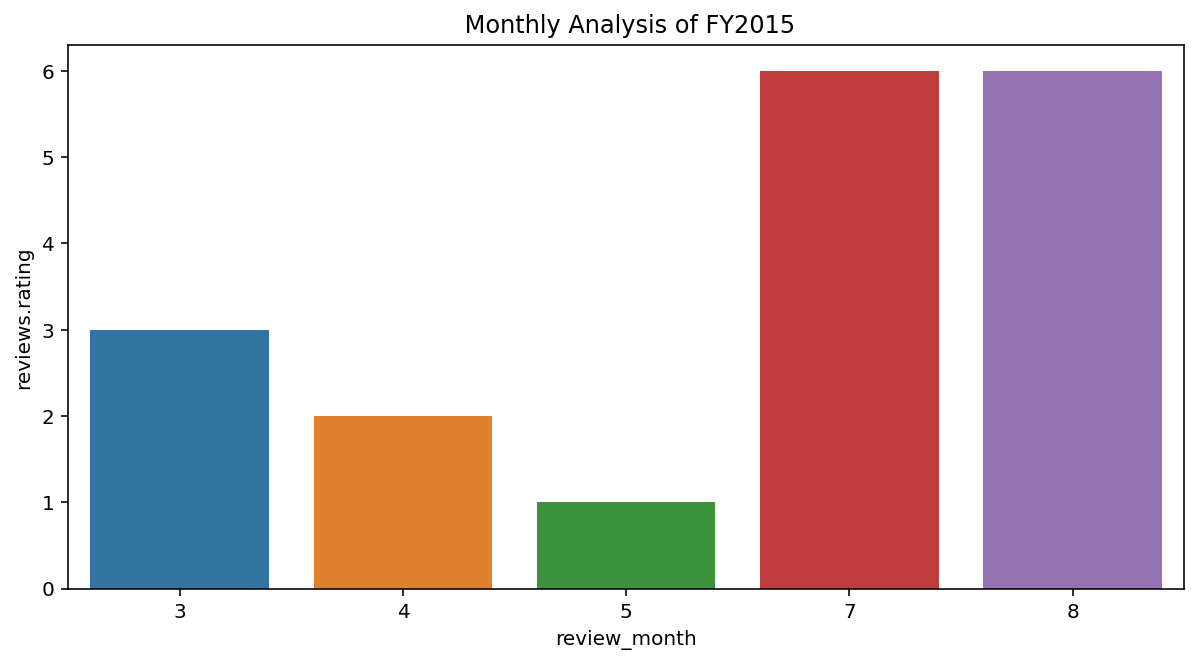

In [29]:
# Plot for negative reviews
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=negative_review.index,y='reviews.rating',data=negative_review)
ax.set_title(" Monthly Analysis of FY2015")

- We can see from yearly graph that **Kindle Voyage E-reader** has decreasing popularity trend after 2016 and by deep diving in 2015 we can say it starts loosing popularity after May'15 so Amazon should find reason for it in 2015 also.

### 2.6.3 Product 3: AmazonBasics 15.6-Inch Laptop and Tablet Bag

In [30]:
# Getting Positive reviews
laptop=Amazon_data[(Amazon_data['name']=='AmazonBasics 15.6-Inch Laptop and Tablet Bag' ) & ( Amazon_data['reviews.rating']>3)]
positive_review=laptop.groupby('review_year').sum()

In [31]:
# Plotting yearly posiive years
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=positive_review.index,y='reviews.rating',data=positive_review)
ax.set_title("Yearly Analysis of positive reviews")

Text(0.5, 1.0, 'Yearly Analysis of positive reviews')

In [32]:
# Setting year 2017 for positive reviews
laptop = laptop  [laptop ['review_year'] == 2017]
positive_review=laptop .groupby('review_month').sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=positive_review.index,y='reviews.rating',data=positive_review)
ax.set_title("Monthly Analysis of positive reviews")

Text(0.5, 1.0, 'Monthly Analysis of positive reviews')

-  No clear patter is visible for **Laptop and Tablet Bag** in yearly and monthly graphs

### Summary of  Performance of amazon products in particular timeline:
- According to our dataset, the analysis done for these products can infer that  popualarity of products is high in next year of launch date and after that it starts decreasing

# 3) Pre processing of Data for Sentiment Analysis

For Sentiment Analysis of Reviews of the customers we need to pre process our text data for feature extraction.As machine learning models cant work directly with text data we need to extract numerical features in order to feed into our model for predctions.Text reviews given by the customers have noises like punctuation marks, emoticons, digits which are not necessary features needed for Sentiment Analysis. Before extracting feature following pre processing are done on the text data:
1. Lower casing 
2. Removing Special Characters
3. Removing emoticons
4. Stop Words removal
5. Normalization of the words( Lemmatization) 

We have 5 different Amazon Ratings of the products. For our Analysis we will set sentiment score as follows

1. Customer Reviews greater than 3 would be mapped as posItive -1


3. Customer Reviews from rating 3 to 1 would be mapped as negative -0

In [33]:
#Only taking the Review text and rating for Sentiment Analysis
Sentiment = Amazon_data[['reviews.rating','reviews.text',]]

## 3.1 Lower Casing

In [34]:
Sentiment['reviews']=[i.lower() for i in Sentiment['reviews.text']]

## 3.2 Removing Special Characters


In [35]:
#Selecting non alpha numeric charactes that are not spaces
spl_chars = Sentiment['reviews'].apply(lambda review:
                                  [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '_',
 '`',
 '{',
 '|',
 '©',
 '¬',
 '¶',
 '‚',
 '†',
 '∏',
 '√',
 '∞',
 '∫',
 '≤'}

In [36]:
# Removing special characters
Sentiment['reviews'] = Sentiment['reviews'].str.replace(r'[^A-Za-z]+', ' ')
Sentiment.head()

reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                             reviews  
0  i order of them and one of the item is bad qua...  
1  bulk is always the less expensive way to go fo...  
2  well they are not duracell but for the price i...  
3  seem to work as well as name brand batteries a...  
4  these batteries are very long lasting the pric...

## 3.3 Removal of emoticons

In [37]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [38]:
import re
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
#remove_emoticons(text)

Sentiment["reviews"] =Sentiment["reviews"].apply(lambda text: remove_emoticons(text))
Sentiment.head()

reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                             reviews  
0  i order of them and one of the item is bad qua...  
1  bulk is always the less expensive way to go fo...  
2  well they are not duracell but for the price i...  
3  seem to work as well as name brand batteries a...  
4  these batteries are very long lasting the pric...

## 3.4 Removal of stopwords

In [39]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return ([word for word in str(text).split() if word not in STOPWORDS])

Sentiment["reviews"] = Sentiment["reviews"].apply(lambda text: remove_stopwords(text))
Sentiment.head()

reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                             reviews  
0  [order, one, item, bad, quality, missing, back...  
1  [bulk, always, less, expensive, way, go, produ...  
2                     [well, duracell, price, happy]  
3  [seem, work, well, name, brand, batteries, muc...  
4           [batteries, long, lasting, price, great]

## 3.5 Lemmatization
- Lemmatization takes into consideration the morphological analysis of the words. So lemmatization considers the grammar of the word and tries to find the root word instead of just getting to the root word by brute force methods

In [40]:
from collections import defaultdict #Default Dictionary is imported from collections
from nltk.corpus import wordnet as wn #the corpus reader wordnet is imported.
from nltk.tag import pos_tag

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values 
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value 
tag_map['V'] = wn.VERB                  #from wordnet dictionary. We have taken the only first letter as 
tag_map['R'] = wn.ADV


In [41]:
from nltk.stem import WordNetLemmatizer

# Initializing WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

Sentiment['reviews']=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in Sentiment['reviews']]

In [42]:
Sentiment['reviews']= Sentiment['reviews'].apply(lambda x: ' '.join(x))
Sentiment.head()

reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                             reviews  
0  order one item bad quality miss backup spring ...  
1     bulk always less expensive way go product like  
2                          well duracell price happy  
3  seem work well name brand battery much good price  
4                   battery long lasting price great

### Looking at the frequent words in our cleaned text data

In [43]:
### Counting Frequent words

from collections import Counter
cnt = Counter()
for text in Sentiment["reviews"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('battery', 10232),
 ('great', 9512),
 ('tablet', 7395),
 ('use', 6709),
 ('good', 6428),
 ('love', 6199),
 ('price', 5468),
 ('buy', 5205),
 ('work', 4589),
 ('amazon', 3945),
 ('get', 3667),
 ('well', 3338),
 ('easy', 3228),
 ('one', 3217),
 ('kid', 3017),
 ('last', 2942),
 ('kindle', 2917),
 ('like', 2820),
 ('long', 2735),
 ('time', 2473)]

In [44]:
#Percentage drop in token

token_lists = [word_tokenize(each) for each in Amazon_data['reviews.text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))


token_lists_new= [word_tokenize(each) for each in Sentiment['reviews']]
tokens_new= [item for sublist in token_lists_new for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_new)))

a=100*len(set(tokens_new))/len(set(tokens))
print("percentage drop in tokens : {:.2f} %".format(a))

Number of unique tokens then:  15307
Number of unique tokens now:  8099
percentage drop in tokens : 52.91 %


### After text pre processing 52.91 % tokens were dropped

## 3.6 Mapping the ratings
#### 1. Ratings = < 3 - Negative : 0
#### 2. Ratings > 3 - Positive : 1

In [45]:
# Mapping the ratings
Sentiment['Sentiment_rating'] = np.where(Sentiment['reviews.rating'] <= 3,0,1)

# Printing the counts of each class
Sentiment['Sentiment_rating'].value_counts()

1    25545
0     2787
Name: Sentiment_rating, dtype: int64

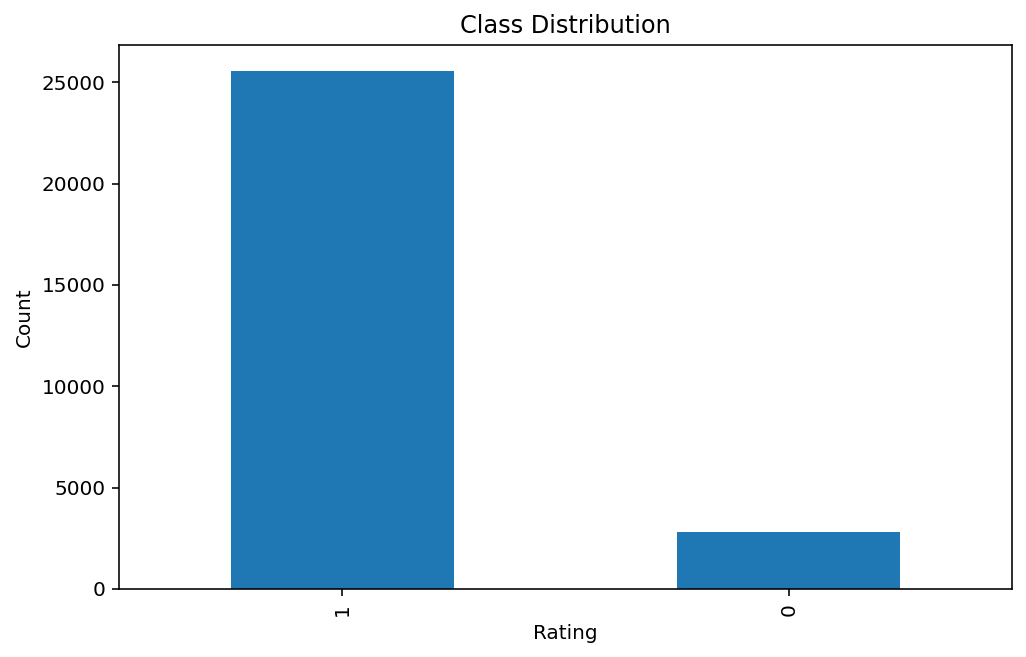

In [46]:
# Plot the bar graph
fig, ax = plt.subplots(figsize=(8,5))
Sentiment['Sentiment_rating'].value_counts().plot.bar()
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
ax.set_title("Class Distribution")
plt.show()

- Class imbalance is evident in our dataset

# 4) Building the Models

## 4.1 Train test split
- Spliting the data into train and test set to check accuracy on unlabeled dataset

In [47]:
# Setting train and target varibale
X=Sentiment['reviews']
y=Sentiment['Sentiment_rating']

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=142)

# Printing the shape
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (19832,)
Shape of y_train (19832,)
Shape of X_test (8500,)
Shape of y_test (8500,)


## 4.2 Feature extraction using TfidfVectorizer

In [48]:
#Initializing the vector

vectorizer = TfidfVectorizer()

# Transforming
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

## 4.3  Model Building
### 4.3.1 Model 1: Logistic Regression

In [49]:
# Intializing Logistic Regression
LR= LogisticRegression(random_state=0).fit(X_train, y_train)

In [50]:
# Prediction
lr_train_predict=LR.predict(X_train) # On Train dataset
lr_test_predict=LR.predict(X_test) # On Test dataset

### Evaluation on Training and Test set:

In [51]:
# Accuracy score
LR_train_accuracy=accuracy_score(y_train,lr_train_predict)
LR_test_accuracy=accuracy_score(y_test,lr_test_predict)

print("Accuracy Score on training set",LR_train_accuracy)
print("Accuracy Score on testing set",LR_test_accuracy)

Accuracy Score on training set 0.938331988705123
Accuracy Score on testing set 0.9296470588235294


- Accuracy on both train and test dataset is high, moreover difference between two accuracies is less which implies model is not overfitted and can be used for other datasets also.

### Confusion matrix on Train dataset

Text(0.5, 1.0, 'Confusion Matrix')

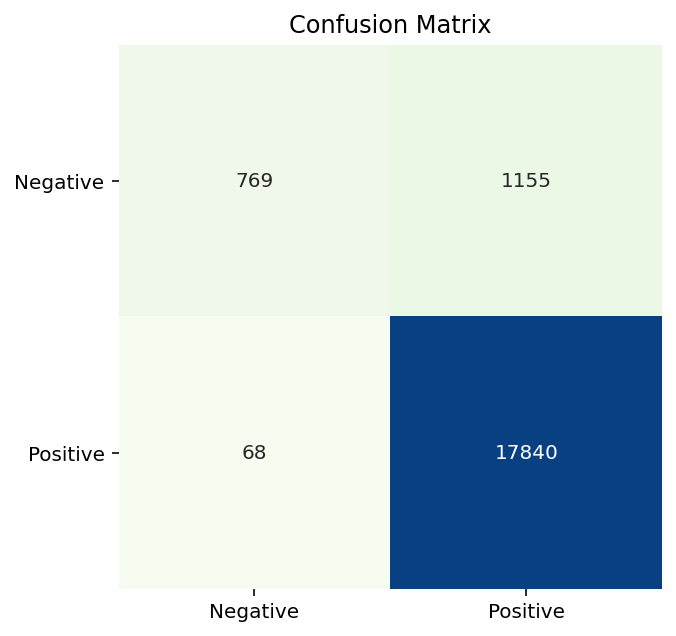

In [52]:
# Confusion matrix
LR_train_confusion=confusion_matrix(y_train,lr_train_predict)
LR_test_confusion=confusion_matrix(y_test,lr_test_predict)

fig, ax = plt.subplots(figsize=(15,5))
ax=sns.heatmap(LR_train_confusion,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.GnBu)

class_labels=['Negative','Positive']
tick_marks=np.arange(len(class_labels))+.5

ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0)

ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_title("Confusion Matrix")

- From confusion matrix we can see model is predicting positive reviews very well but for negative reviews it is lacking, may be due to the reason of less data for negative reviews in dataset

### Confusion matrix on Test Dataset

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.heatmap(LR_test_confusion,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.GnBu)

class_labels=['Negative','Positive']
tick_marks=np.arange(len(class_labels))+.5

ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0)

ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_title("Confusion Matrix")

Text(0.5, 1.0, 'Confusion Matrix')

- Similiar pattern as of train confusion matrix can be seen in test confusion matrix

In [54]:
# Classification report

from sklearn.metrics import classification_report

target_names = ['Negative', 'Postive']

print(classification_report(y_test,lr_test_predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.86      0.37      0.51       863
     Postive       0.93      0.99      0.96      7637

    accuracy                           0.93      8500
   macro avg       0.90      0.68      0.74      8500
weighted avg       0.93      0.93      0.92      8500



- For the Test set, precision is highr for both the classes whereas F1 score and recall is lower for negative class

### 4.3.2 Model 2: Multi-layer Perceptron classifier

In [55]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)

# Train the model
mlp.fit(X_train,y_train)

#Prediction
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

### Evaluation on Training and Test set:

In [56]:
# Accuracy score

MLP_train_accuracy=accuracy_score(y_train,y_train_pred)
MLP_test_accuracy=accuracy_score(y_test,y_test_pred)

print("Accuracy Score on training set",MLP_train_accuracy)
print("Accuracy Score on testing set",MLP_test_accuracy)

Accuracy Score on training set 0.9968233158531666
Accuracy Score on testing set 0.9511764705882353


- Accuracy score for train dataset is very high almost equal to 1 but score for test dataset is also very high(~0.96). There is concern of whether the model is overfitted or not. We can make conclusion about this by making confusion matrix

### Confusion matrix on Train dataset

Text(0.5, 1.0, 'Confusion Matrix')

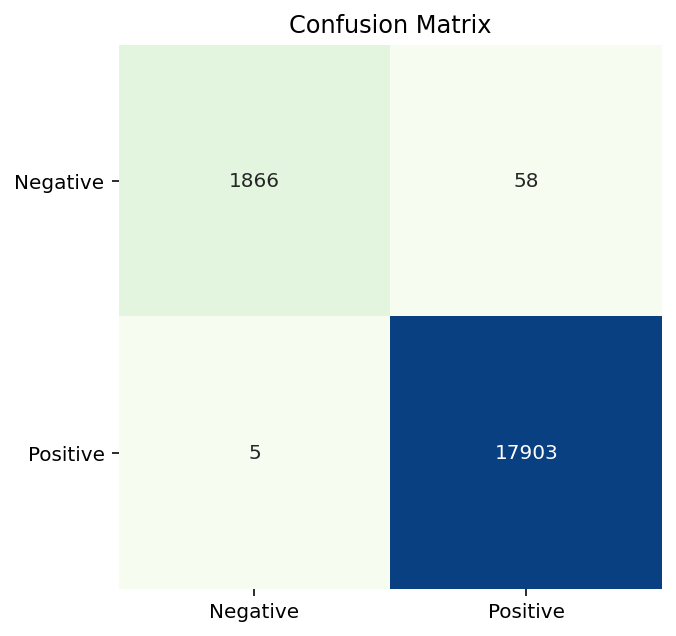

In [57]:
mlp_train_conf=confusion_matrix(y_train,y_train_pred)
mlp_test_conf=confusion_matrix(y_test,y_test_pred)

fig, ax = plt.subplots(figsize=(15,5))
ax=sns.heatmap(mlp_train_conf,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.GnBu)

class_labels=['Negative','Positive']
tick_marks=np.arange(len(class_labels))+.5

ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0)

ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_title("Confusion Matrix")

- Model is performing well for both the classes, it is capturing negative reviews also despite of class imbalance

### Confusion matrix on Test dataset

Text(0.5, 1.0, 'Confusion Matrix')

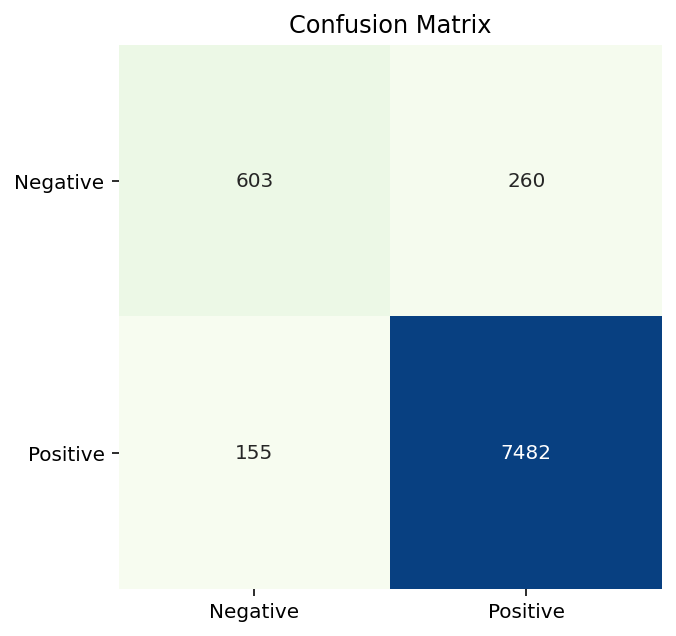

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.heatmap(mlp_test_conf,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.GnBu)

class_labels=['Negative','Positive']
tick_marks=np.arange(len(class_labels))+.5

ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0)

ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_title("Confusion Matrix")

- On test dataset also model is doing well for both positive and negative dataset and  it does not seem that there is case of overfitting as model is performing better than Logistic regression and capturing good amount of negative reviews

## 4.4 Comparison of Models

In [59]:
# Comparing the efficiances of models
n_acc_train = [LR_train_accuracy,MLP_train_accuracy]
n_acc_test = [LR_test_accuracy,MLP_test_accuracy]

X = ['Logistic Regression','Neural (MLP)']
  
X_axis = np.arange(len(X))
fig, ax = plt.subplots(figsize=(8,5))  
plt.bar(X_axis - 0.2, n_acc_train, 0.4, label = 'Train dataset')
plt.bar(X_axis + 0.2, n_acc_test, 0.4, label = 'Test dataset')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Efficeny of models")
plt.legend()
plt.show()

- Overall, we can say MLP model is predicting very well and it is capturing negative reviews as well despite of less data for negative reviews whereas for positve reviews Logistic Regression is also doing well.

## 4.5 Business Perspective 

In [60]:
# Prediction for different thresholds
y_score_LR = LR.predict_proba(X_test)[:,1]
y_score_MLP = mlp.predict_proba(X_test)[:,1]

# TPR/FPR Rate
false_positive_rate_LR, true_positive_rate_LR, threshold_LR = roc_curve(y_test, y_score_LR)
false_positive_rate_MLP, true_positive_rate_MLP, threshold_MLP = roc_curve(y_test, y_score_MLP)

# AUC score
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score_LR))
print('roc_auc_score for MLP: ', roc_auc_score(y_test, y_score_MLP))

roc_auc_score for Logistic Regression:  0.9235929974990634
roc_auc_score for MLP:  0.9356930210017675


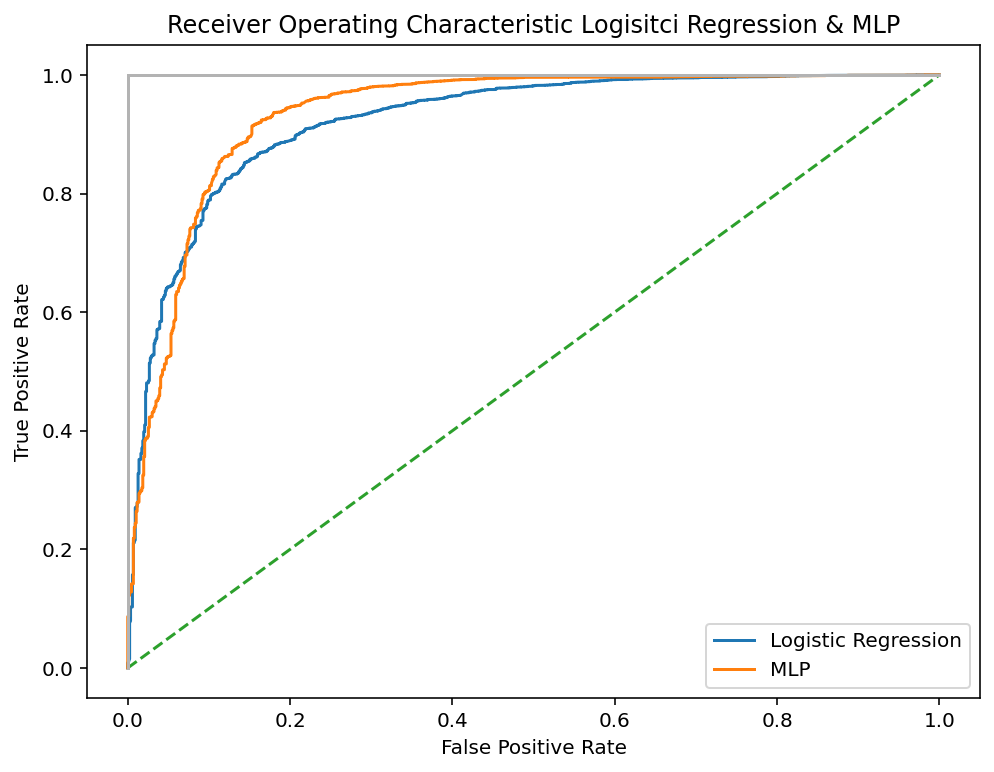

In [61]:
# Plot the curve
fig, ax = plt.subplots(figsize=(8,6))
ax=plt.title('Receiver Operating Characteristic Logisitci Regression & MLP')
ax=plt.plot(false_positive_rate_LR, true_positive_rate_LR,label='Logistic Regression')
ax=plt.plot(false_positive_rate_MLP, true_positive_rate_MLP,label='MLP')
ax=plt.plot([0, 1], ls="--")
ax=plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax=plt.ylabel('True Positive Rate')
ax=plt.xlabel('False Positive Rate')
ax=plt.legend()

- More the area under the AUC curve implies better model therefore MLP is better model than Logistic
- Moreover, threshold value is something which should be decided by domain expertise but with our knowledge  we recommend that False positive rate should be less so that all negative reviews can be captured and one can improve the product/marketing strategy according to that

# 5) Appendix

## 5.1 Model 1: Naive Bayes (Multinomial)

In [62]:
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB().fit(X_train, y_train)

NB_train_predict=NB.predict(X_train)
NB_test_predict=NB.predict(X_test)

In [63]:
# Accuracy score

NB_train_accuracy=accuracy_score(y_train,NB_train_predict)
NB_test_accuracy=accuracy_score(y_test,NB_test_predict)

print("Accuracy Score on training set",NB_train_accuracy)
print("Accuracy Score on testing set",NB_test_accuracy)

Accuracy Score on training set 0.9143807987091569
Accuracy Score on testing set 0.9050588235294118


In [64]:
# Classification report
target_names = ['Negative', 'Postive']

print(classification_report(y_test,NB_test_predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.88      0.08      0.14       863
     Postive       0.91      1.00      0.95      7637

    accuracy                           0.91      8500
   macro avg       0.89      0.54      0.54      8500
weighted avg       0.90      0.91      0.87      8500



- Naive bayes is not goood in capturing negative reviews as we can see F1 score is very low.

## 5.2 Model 2: Decision Tree Classifier

In [65]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=142)

dt.fit(X_train,y_train)
y_train_predictions = dt.predict(X_train)
y_test_predictions = dt.predict(X_test)

In [66]:
# Accuracy score

DT_train_accuracy=accuracy_score(y_train,y_train_predictions)
DT_test_accuracy=accuracy_score(y_test,y_test_predictions)

print("Accuracy Score on training set",DT_train_accuracy)
print("Accuracy Score on testing set",DT_test_accuracy)

Accuracy Score on training set 0.9972267043162566
Accuracy Score on testing set 0.9347058823529412


In [67]:
# Classification Report
target_names = ['Negative', 'Postive']

print(classification_report(y_test,y_test_predictions, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.69      0.64      0.67       863
     Postive       0.96      0.97      0.96      7637

    accuracy                           0.93      8500
   macro avg       0.83      0.81      0.82      8500
weighted avg       0.93      0.93      0.93      8500



-  Decision tree classifier is getting overfitted, so it will not work good for other datasets

## 5.3 Word2Vec
- Using different Feature extraction

In [68]:
from nltk.tokenize import word_tokenize
Sentiment['reviews1'] = [word_tokenize(i) for i in Sentiment['reviews']]
Sentiment.head()

reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                             reviews  Sentiment_rating  \
0  order one item bad quality miss backup spring ...                 0   
1     bulk always less expensive way go product like                 1   
2                          well duracell price happy                 1   
3  seem work well name brand battery much good price                 1   
4                   battery long lasting price great                 1   

                                            reviews1  
0  [order, one, item, bad, quality, miss, backup,...  
1  [bulk, always, less, expensive, way, go, produ...  
2                     [well, duracell, price, happy]  
3  [seem, work, well, name, brand, battery, much,...  
4             [battery, long, lasting, price, great]

In [69]:
import gensim

Min_count=1      #It will ignore all the words with a total frequency lower than this
Size = 300      #It tells the dimensionality of the word vectors
Workers=4        #These are the threads to train the model
Window=5         #Maximum distance between the current and predicted word within a sentence
#train word2vec model
model = gensim.models.Word2Vec(sentences = Sentiment['reviews1'],vector_size=Size,window=Window, workers = Workers, min_count = Min_count)

In [70]:
# Checking similiarity
model.wv.most_similar("great")

[('awesome', 0.9271821975708008),
 ('excellent', 0.9031988382339478),
 ('good', 0.8641663789749146),
 ('wonderful', 0.8424296379089355),
 ('especially', 0.8255102038383484),
 ('amaze', 0.8250492215156555),
 ('buggy', 0.820565402507782),
 ('amazing', 0.8126242160797119),
 ('perfect', 0.8111575245857239),
 ('helper', 0.7992920875549316)]

In [71]:
#Build word vector set by using the average value of all word vectors , then scale

def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0 
    for word in text: 
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [72]:
from sklearn.preprocessing import scale

vecs = np.concatenate([buildWordVector(z, Size) for z in Sentiment['reviews1']])

print("Before Scaling:",vecs[1:2])

vecs = scale(vecs)

print("After Scaling:",vecs[1:2])

Before Scaling: [[-0.15883836 -0.12574068  0.19939867  0.04394259  0.08532195  0.07981225
   0.11865937  0.27991998  0.07653037 -0.24677651  0.02891812  0.08065628
   0.04808061  0.00234507 -0.06730321 -0.05418799  0.15626848 -0.09320544
  -0.02237387  0.14764848 -0.25189268 -0.02188428  0.15480456  0.13741339
   0.1544079   0.09947065 -0.09357018  0.01303832 -0.03363738 -0.30173465
   0.04019155  0.07425169  0.22168486 -0.18386283 -0.15096311  0.0932262
   0.2056756  -0.39202985 -0.14273512  0.08983841 -0.139885    0.25821842
  -0.04149011 -0.1416234   0.20773622  0.22553642  0.32177441  0.14415682
   0.08316036  0.14863857  0.12533876  0.01325029  0.00190579 -0.06134726
  -0.1521085  -0.13229643  0.06454304  0.08826677  0.05575856 -0.02274736
  -0.1223902   0.08629554  0.21223388 -0.03812087 -0.07632056 -0.09018268
  -0.11987813  0.03510671 -0.05516748 -0.08027968 -0.1796931   0.00114776
   0.08380613 -0.27181238  0.08882223  0.22949025 -0.09622192  0.05836712
  -0.19746434  0.118166

In [73]:
vecs.shape

(28332, 300)

In [74]:
# Plotting the vectors
plt.figure(figsize=(7,7))
plt.scatter(vecs[:, 0], vecs[:, 1], s=3, cmap='Spectral')

### 5.3.1 Logistic Regression

In [75]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(vecs,Sentiment['Sentiment_rating'],test_size=0.3,random_state=142)

# Predictions
LR= LogisticRegression(random_state=0).fit(X_train, y_train)
lr_train_predict=LR.predict(X_train)
lr_test_predict=LR.predict(X_test)

In [76]:
# Accuracy Score
LR_train_accuracy_w=accuracy_score(y_train,lr_train_predict)
LR_test_accuracy_w=accuracy_score(y_test,lr_test_predict)

print("Accuracy Score on training set",LR_train_accuracy_w)
print("Accuracy Score on testing set",LR_test_accuracy_w)

Accuracy Score on training set 0.9152884227511093
Accuracy Score on testing set 0.9107058823529411


### 5.3.2 Multi Layer Perceptron

In [77]:
# Train the model
mlp.fit(X_train,y_train)

#Prediction
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [78]:
# Accuracy Score
MLP_train_accuracy_w=accuracy_score(y_train,y_train_pred)
MLP_test_accuracy_w=accuracy_score(y_test,y_test_pred)

print("Accuracy Score on training set",MLP_train_accuracy_w)
print("Accuracy Score on testing set",MLP_test_accuracy_w)

Accuracy Score on training set 0.9671238402581687
Accuracy Score on testing set 0.9288235294117647


- Accuracy has decreased by using Word2vec for both the models (Logistic and MLP) so **TFIDV** is used to build the models.

## 5.4 Comparison

In [79]:
# Comparing the efficiances of models
n_acc_train = [NB_train_accuracy,DT_train_accuracy,LR_train_accuracy_w,MLP_train_accuracy_w]
n_acc_test = [NB_test_accuracy,DT_test_accuracy,LR_test_accuracy_w,MLP_test_accuracy_w]

X = ["Naive Bayes",'Decision Tree','Logistic(Word2vec)','MLP(Word2vec)']
  
X_axis = np.arange(len(X))
fig, ax = plt.subplots(figsize=(10,5))  
plt.bar(X_axis - 0.2, n_acc_train, 0.4, label = 'Train dataset')
plt.bar(X_axis + 0.2, n_acc_test, 0.4, label = 'Test dataset')
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Efficeny of models")
plt.legend()
plt.show()

- Test accuracy is more or less same for all the models.

# Summary
- Amazon consumer review dataset has imbalanced classes and count of words/review is also right skewed.
- Most of the products in dataset are electronics more like batteries, tablets and fire tv stick. Alkaline batteries have most number of reviews but it does not conclude that its popular. After visualizing the trend of the customers reviews, most of the amazon products are getting higher popularity after the first year of launch date but decreasing in the following year.
- To Overcome the issue of overfitting and biased classification different models were implemented and we find Multilayer perceptron is performing comparatively better while classifying the negative classes(Imbalance Class)
- Different Feature Extraction techniques like,Word2Vector was also implemented but model performance didn’t improve.